# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_year.csv', index_col=0)

In [3]:
# add incidents per capita column
df['incidents_per_capita'] = df['incident_ct_total'] / df['population']

In [4]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,country_code,region,region_txt,arrivals,population,tourism_rank_2012,...,nkillus_total,nkillte_total,nwound_total,nwoundus_total,nwoundte_total,nvictim_total,nvictimus_total,nvictimte_total,incident_ct_total,incidents_per_capita
0,2012,5,Albania,NaN,ALB,NaN,NaN,3156000,2900401,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00
1,2012,6,Algeria,Algeria,DZA,10.0,Middle East & North Africa,2634000,37383887,65,...,0.0,2.0,76.0,0.0,0.0,101.0,0.0,2.0,27,7.222363e-07
2,2012,7,Andorra,NaN,AND,NaN,NaN,2238000,82427,73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00
3,2012,8,Angola,NaN,AGO,NaN,NaN,528000,25107931,113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00
4,2012,10,Antigua and Barbuda,NaN,ATG,NaN,NaN,247000,90409,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00


In [5]:
# TODO: drop unused columns

# Exploratory plotting

Before I create the plot we mocked up, I want to get an idea for the distribution of incidents, populations, and incidents per capita for all countries and all years.

In [6]:
# define columns of interest
columns_of_interest = ['incident_ct_total', 'population', 'incidents_per_capita']

In [7]:
# describe columns of interest
df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,1078.000000,1.078000e+03,1.078000e+03
mean,15.210575,4.056657e+07,6.011824e-07
std,59.751118,1.555498e+08,2.662523e-06
min,0.000000,1.073900e+04,0.000000e+00
25%,0.000000,2.029969e+06,0.000000e+00
50%,0.000000,7.364150e+06,0.000000e+00
75%,4.000000,2.620072e+07,2.339494e-07
max,671.000000,1.392730e+09,5.632613e-05


All variables have 1078 values.

The number of incidents range from 0 to 671. Most values are 0. The median is 0, the mean is 15, and the standard deviation of 59.75. The distribution has many low numbers with a few extremely high numbers - it is right skewed.

The populatioin ranges from 10,739 to 1,392,730,000. The median is 7,364,150, the mean is 40,566,569, and the standard deviation is 155,549,802. The distribution also has a right skew, but not as much as the number of incidents.

The incidents per capita range from 0 to 0.00005. Most values are 0. This distribution is right skewed. The non-zero numbers are very small, making them difficult to interpret and discuss. We may want to adjust the scale of our plot. Perhaps we could adjust population to be in the thousands, so that this number would have the unit of "incidents per 1000 people" rather than "incidents per capita".

In [8]:
def plot_histogram(column_name):
    plt.hist(df[column_name], bins=30, label=column_name)
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.show()

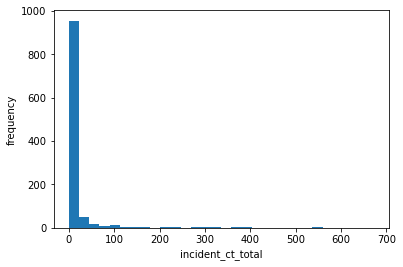

In [9]:
plot_histogram('incident_ct_total')

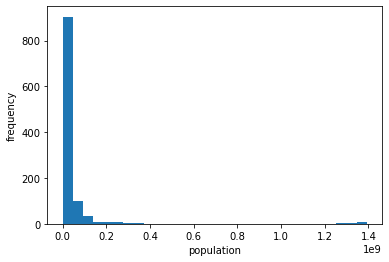

In [10]:
plot_histogram('population')

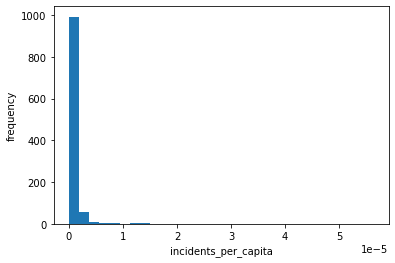

In [11]:
plot_histogram('incidents_per_capita')

# Plot violin plot

In [12]:
# find slices for all countries, and countries with high and low tourism
all_x = df['incidents_per_capita']
high_x = df[df['tourism_group']=='high']['incidents_per_capita']
low_x = df[df['tourism_group']=='low']['incidents_per_capita']

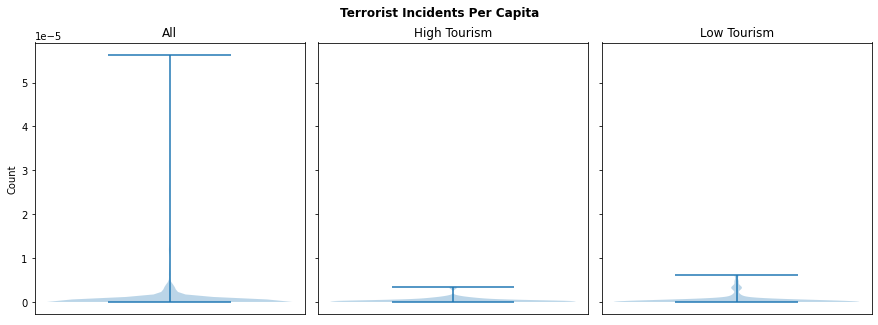

In [13]:
# initialize figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Terrorist Incidents Per Capita', fontsize=12, fontweight ="bold")

# create violin plots
ax1.violinplot(all_x)
ax2.violinplot(high_x)
ax3.violinplot(low_x)

# add subplot titles
ax1.set_title('All')
ax2.set_title('High Tourism')
ax3.set_title('Low Tourism')

# remove x-axis
for ax in [ax1, ax2, ax3]: ax.xaxis.set_visible(False)

# add y-axis label
ax1.set_ylabel('Count')

# show plot
plt.show()

Quite frankly... I think this plot is useless! I have learned very little from this plot that I didn't already know from the statistics description above, and it doesn't show it very intuitively. I will try a discrete encoding instead of a continuous one, and see if that improves it.

# Plot swarm plot

I'm going to try a swarmplot, to see the observations themselves. Since pyplot doesn't have a default function for swarmplots, I will use seaborn instead.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


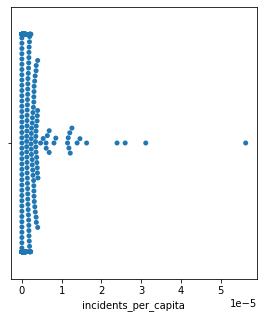

In [14]:
# initialize figure
plt.figure(figsize=(15, 5))

# create swarmplot for all countries
plt.subplot(1, 3, 1)
ax1 = sns.swarmplot(x=all_x)

# create swarmplot for high tourism countries
#plt.subplot(1, 3, 2)
#sns.swarmplot(x=high_x)

# create swarmplot for low tourism countries
#plt.subplot(1, 3, 2)
#sns.swarmplot(x=low_x)

This plot throws an error, because it can't fit all the 0 values in one spot. Seaborn recommends a stripplot instead, which I'll try now.

# Experiment with different facets in seaborn

I am going to try some more plotting types quickly in seaborn, which is more fully featured (e.g. has stripplots and easy faceting by categorical variable) and has convenient grammar-of-graphics style encodings. Quick go!!!

### Violin plot

<AxesSubplot:ylabel='incidents_per_capita'>

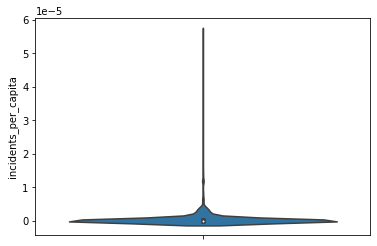

In [24]:
# create violin plot for all countries
sns.violinplot(y='incidents_per_capita', data=df)

<AxesSubplot:xlabel='tourism_group', ylabel='incidents_per_capita'>

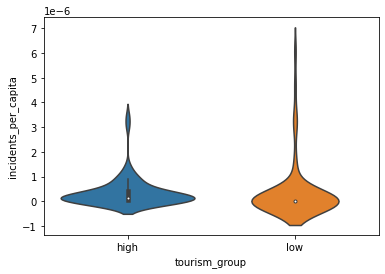

In [25]:
# create violin plot for high and low tourism countries
sns.violinplot(x='tourism_group', y='incidents_per_capita', data=df)

<AxesSubplot:xlabel='year', ylabel='incidents_per_capita'>

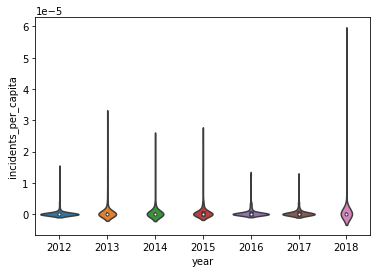

In [27]:
# create violin plot for all countries, split by year
sns.violinplot(x='year', y='incidents_per_capita', data=df)

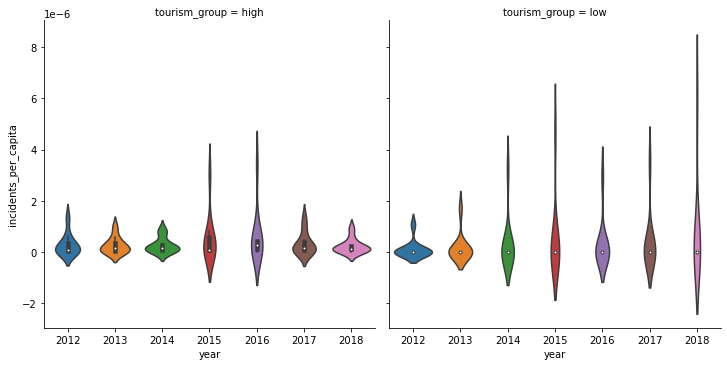

In [26]:
# create violin plot for high and low tourism countries, split by year
sns.catplot(x='year', y='incidents_per_capita', col='tourism_group', data=df, kind='violin')

# Stripplots

In [ ]:
sns.stripplot(x='year', y='incidents_per_capita', col='tourism_group', data=df, kind='strip')

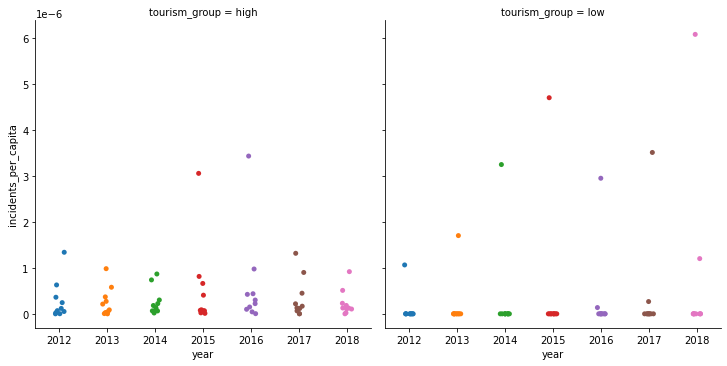

In [19]:
sns.catplot(x='year', y='incidents_per_capita', col='tourism_group', data=df, kind='strip')

So far, I'm liking the stripplots best. I like that you can see that clump of zero values. I like looking  at year-by-year, although I don't know that it's necessary. I'd like to create a stripplot for each tourism grouping. I think it could also be useful to add a log scaling to one of the variables... I'll need to think on that more.